In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import re
import os

from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers.recurrent import SimpleRNN

In [4]:
root = "imdb/aclImdb"
   
splits = ['train', 'test']
labels = ['pos', 'neg']
paths = ["%s/%s/%s" %(root, split, label ) for split in splits for label in labels]

files=[]
for path in paths:
    files += ['%s/%s' %(path,x) for x in os.listdir(path)]
    
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

def readFile(f):
    with open(f) as fin:
        return remove_tags(" ".join(fin.readlines()))
    
input_label = ([1] * 12500 + [0] * 12500) * 2
input_text  = [readFile(f) for f in files]


In [5]:
train_size = 25000
num_words = 10000
tok = Tokenizer(num_words)
tok.fit_on_texts(input_text[:train_size])
maxlen=100
vocab_dim = 100

In [6]:
X_train = tok.texts_to_sequences(input_text[:train_size])
y_train = input_label[:train_size]

X_test  = tok.texts_to_sequences(input_text[train_size:])
y_test  = input_label[train_size:]

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test  = sequence.pad_sequences(X_test,  maxlen=maxlen)

In [19]:
if 0:
    import w2v
    embeddings = w2v.Word2VecModel('GoogleNews-vectors-negative300.bin')
    embedding_weights = np.zeros((num_words,vocab_dim))
    inverted_index = {v:k for k,v in tok.word_index.iteritems()}
    for i in xrange(1, num_words):
        embedding_weights[i] = embeddings.lookup(inverted_index[i], False)


In [ ]:
model = Sequential()

model.add(Embedding(num_words, 32, input_length=100))
model.add(Dropout(0.25))

model.add(SimpleRNN(16, return_sequences=False))

model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
trainedModel = model.fit(X_train, y_train, batch_size=32, nb_epoch=5, verbose=1,
          validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 71s - loss: 0.5647 - acc: 0.6738 - val_loss: 0.4163 - val_acc: 0.8230
Epoch 2/5
11200/25000 [============>.................] - ETA: 29s - loss: 0.3695 - acc: 0.8434

['acc', 'loss', 'val_acc', 'val_loss']


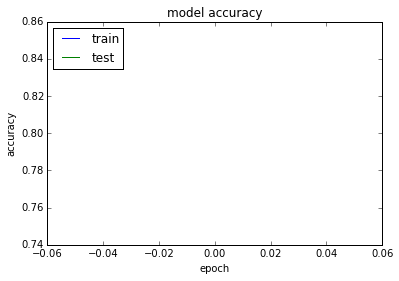

In [8]:
print(trainedModel.history.keys())
# summarize history for accuracy
plt.plot(trainedModel.history['acc'])
plt.plot(trainedModel.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
